In [2]:
# =========================================
# 1. Import Libraries
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

os.makedirs("images", exist_ok=True)


# =========================================
# 2. Load Dataset from Web
# =========================================
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape


(891, 12)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df['Age'].describe()


,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [10]:
df['Fare'].describe()


,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [11]:
df['Pclass'].value_counts()


,count
Pclass,
3,491
1,216
2,184


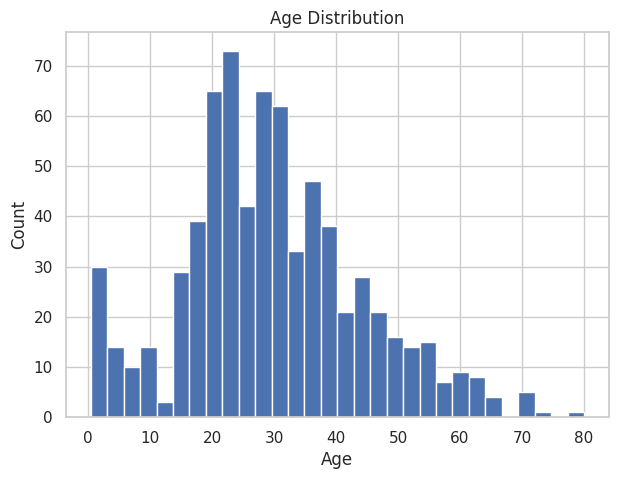

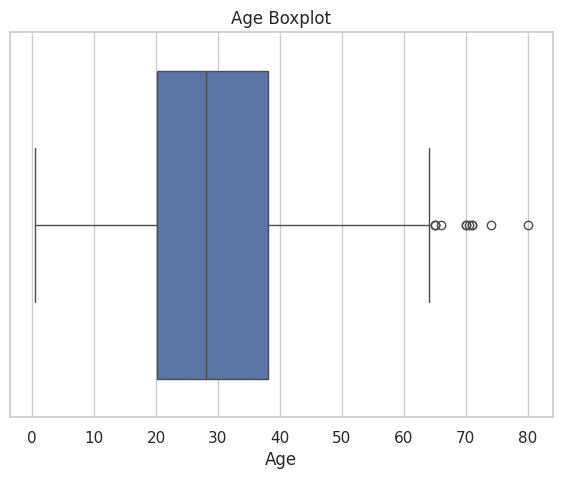

In [12]:
plt.figure(figsize=(7,5))
plt.hist(df['Age'].dropna(), bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.savefig("images/age_hist.png")
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(x=df['Age'])
plt.title("Age Boxplot")
plt.savefig("images/age_box.png")
plt.show()


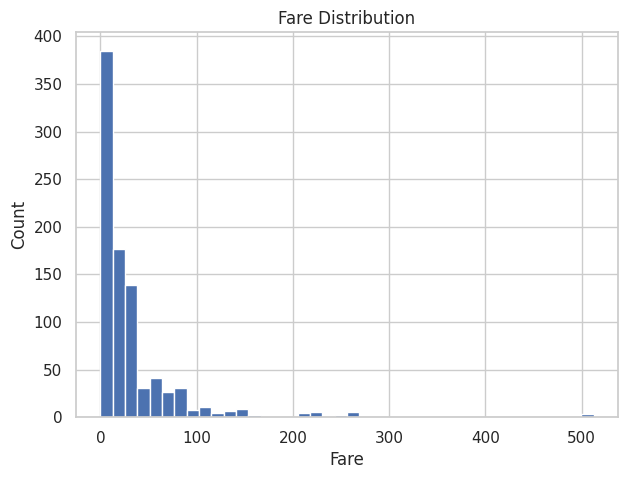

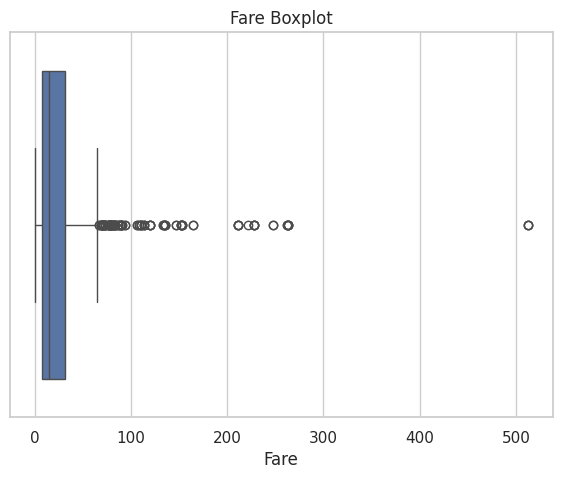

In [13]:
plt.figure(figsize=(7,5))
plt.hist(df['Fare'], bins=40)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.savefig("images/fare_hist.png")
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(x=df['Fare'])
plt.title("Fare Boxplot")
plt.savefig("images/fare_box.png")
plt.show()


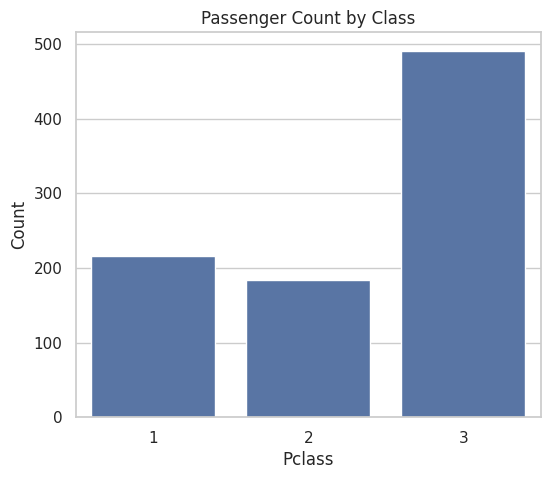

In [14]:
plt.figure(figsize=(6,5))
sns.countplot(x=df['Pclass'])
plt.title("Passenger Count by Class")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.savefig("images/pclass_bar.png")
plt.show()


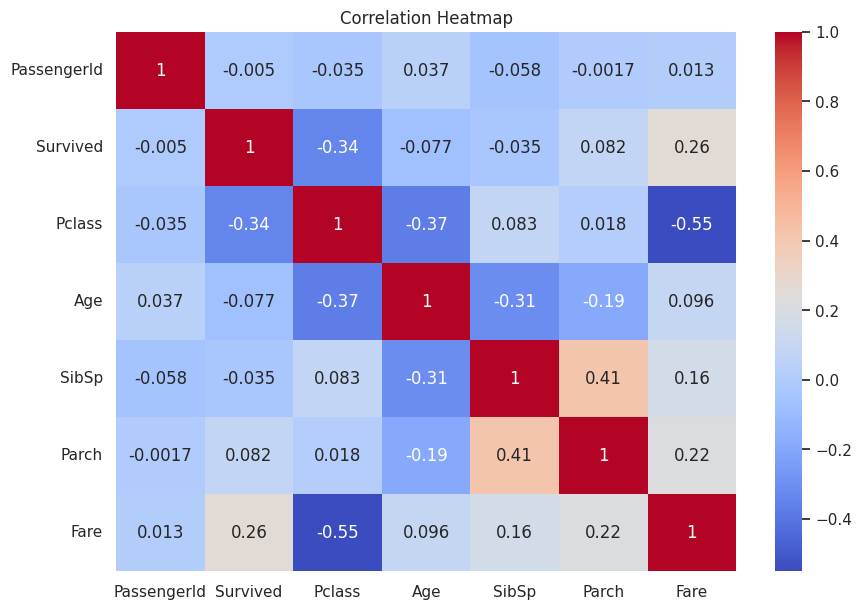

In [15]:
plt.figure(figsize=(10,7))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("images/correlation_heatmap.png")
plt.show()


In [17]:
df_clean = df.drop(columns=["Cabin", "Ticket", "Name"])


In [18]:
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())


In [19]:
df_clean['Embarked'] = df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0])


In [20]:
df_clean['Sex'] = df_clean['Sex'].map({"male": 1, "female": 0})


In [21]:
df_clean.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [22]:
df_clean.to_csv("cleaned_titanic.csv", index=False)
df_clean.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S
